In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


## Loading the Dataset

In [2]:
csv_file = "melbourne_data.csv"  ; 
water_df = pd.read_csv(csv_file);
print(water_df.head()) ; 

   avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  


## Checking for missing values

In [3]:
print("Missing values in each column:\n",water_df.isnull().sum()) ; 

Missing values in each column:
 avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64


#### As there are no missing values we need not handle them explicitly.

## Making and displaying the correlation matrix 

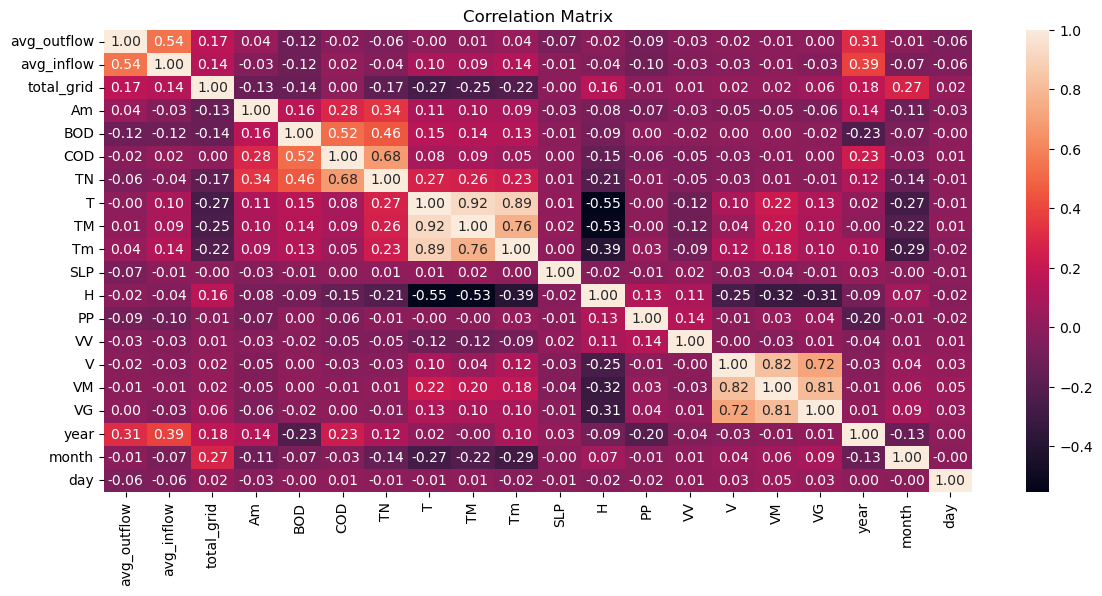

In [4]:
corr_matrix = water_df.corr() ; 
plt.figure(figsize=(14,6)) ; 
sns.heatmap(corr_matrix,annot=True,fmt=".2f") ; 
plt.title("Correlation Matrix") ; 
plt.show() ;


### SPLITTING THE DATASET INTO FEATURES AND TARGETS
avg_outflow  
avg_inflow     
total_grid - energy consumption     
Am - Ammonia            
BOD - Biochemical oxygen demand   
COD - Chemical oxygen deman d
TN - Nitrogen
T  - Avg temperature
TM  - Max temperature
Tm  - Min temperature
SLP - Sea level pressure
H - humidity
PP  - precipitation   
VV  -visibility
V  - avg wind speed
VM - max wind speed
VG - ground wind speed
year           
month          
day            
From the above features , taking COD (Chemical Oxygen Demand ) as the factor which determines the operational performance good(1) or bad(0). I have set 800 as the value below which I classify the performance as optimal.

In [5]:
X = water_df.drop(columns=['COD']).values ; 
y = water_df['COD'].values;
y = (y <= 800).astype(int)   ; 
scaler = StandardScaler() ; 
X = scaler.fit_transform(X) ; 
X_train, X_test,  y_train, y_test = train_test_split(X , y,test_size=0.2 ,random_state=42) ; 

## Implementation of various ML algorithms on the dataset

Epoch 0/2000 - Loss:0.6931
Epoch 100/2000 - Loss:0.5461
Epoch 200/2000 - Loss:0.4955
Epoch 300/2000 - Loss:0.4687
Epoch 400/2000 - Loss:0.4520
Epoch 500/2000 - Loss:0.4406
Epoch 600/2000 - Loss:0.4323
Epoch 700/2000 - Loss:0.4260
Epoch 800/2000 - Loss:0.4211
Epoch 900/2000 - Loss:0.4172
Epoch 1000/2000 - Loss:0.4140
Epoch 1100/2000 - Loss:0.4113
Epoch 1200/2000 - Loss:0.4091
Epoch 1300/2000 - Loss:0.4072
Epoch 1400/2000 - Loss:0.4055
Epoch 1500/2000 - Loss:0.4041
Epoch 1600/2000 - Loss:0.4029
Epoch 1700/2000 - Loss:0.4018
Epoch 1800/2000 - Loss:0.4008
Epoch 1900/2000 - Loss:0.3999


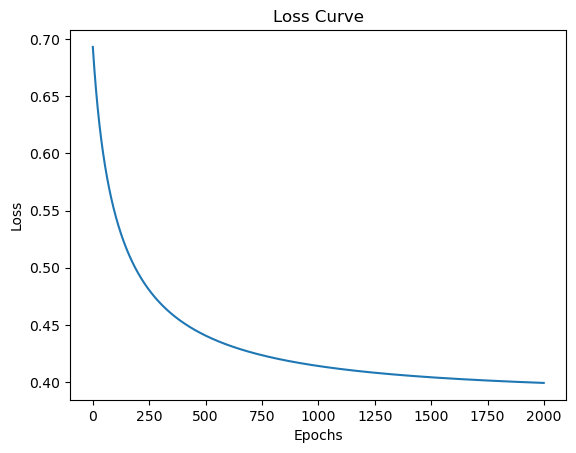

In [6]:
# Implementation of Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01,epochs=1000):
        self.learning_rate = learning_rate ; 
        self.epochs = epochs;
        self.weights = None ; 

    # Sigmoid function
    def sigmoid(self,z):
        return 1/(1+np.exp(-z)) ; 

    def initialize_weights(self,n_features):
        return np.zeros(n_features) ; 

    # Gradient and loss calculation
    def compute_loss_and_gradients(self,X,y,weights):
        m = len(y) ; 
        z = np.dot(X,weights) ; 
        predictions = self.sigmoid(z) ; 
        loss = -np.mean(y * np.log(predictions + 1e-15) + (1-y)*np.log(1 - predictions + 1e-15)) ; 
        dw = np.dot(X.T,(predictions-y))/m ; 
        return loss, dw ;

    # Fitting the model
    def fit(self,X,y):
        m,n = X.shape ; 
        self.weights = self.initialize_weights(n) ; 
        losses = [] ; 
        for epoch in range(self.epochs):
            loss, dw = self.compute_loss_and_gradients(X,y,self.weights) ; 
            self.weights-= self.learning_rate*dw ; 
            losses.append(loss) ; 
            if epoch%100 == 0:
                print(f"Epoch {epoch}/{self.epochs} - Loss:{loss:.4f}") ; 
        return losses ; 

    # Predictions
    def predict(self,X,threshold=0.5):
        probabilities = self.sigmoid(np.dot(X,self.weights)) ; 
        return (probabilities>=threshold).astype(int) ; 

# Train the logistic regression model
lr_scratch = LogisticRegressionScratch(learning_rate=0.02,epochs=2000) ; 
losses = lr_scratch.fit(X_train, y_train) ; 

# Plotting the loss function
plt.plot(range(len(losses)),losses) ; 
plt.title("Loss Curve");
plt.xlabel("Epochs") ; 
plt.ylabel("Loss")  ;
plt.show() ; 

# Prediction
y_pred_scratch = lr_scratch.predict(X_test);

In [7]:
# Logistic Regression using Sklearn
lr_sklearn = LogisticRegression(max_iter=1000) ; 
lr_sklearn.fit(X_train, y_train); 
y_pred_sklearn = lr_sklearn.predict(X_test) ; 

In [8]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5) ; 
knn.fit(X_train,y_train) ; 
y_pred_knn = knn.predict(X_test)

In [9]:
# Decision tree method 
dt = DecisionTreeClassifier(random_state=42) ; 
dt.fit(X_train, y_train) ; 
y_pred_dt = dt.predict(X_test)


In [10]:
# Random Forest method
rf = RandomForestClassifier(n_estimators=100, random_state=42) ; 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test) ; 


In [11]:
# Support vector machine method
svm = SVC(kernel='linear', random_state=42);
svm.fit(X_train, y_train) ; 
y_pred_svm = svm.predict(X_test) ; 

In [12]:
# Evaluation function 
def evaluate_model(model,X_test, y_test,model_name):

    y_pred = model.predict(X_test) ; 
    acc = accuracy_score(y_test, y_pred) ; 
    f1 = f1_score(y_test, y_pred) ; 
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Evaluating {model_name}") ; 
    print(f"Accuracy: {acc:.4f}") ; 
    print(f"F1 Score: {f1:.4f}") ;
    print(f"Confusion Matrix:\n{conf_matrix}\n") ; 

    # Plot confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(conf_matrix,display_labels=['Good performance','Bad performance']) ; 
    disp.plot(cmap='Blues') ; 
    plt.title(f"Confusion Matrix: {model_name}") ; 
    plt.show() ; 

Evaluating Logistic Regression (Scratch)
Accuracy: 0.8412
F1 Score: 0.7944
Confusion Matrix:
[[148  38]
 [  6  85]]



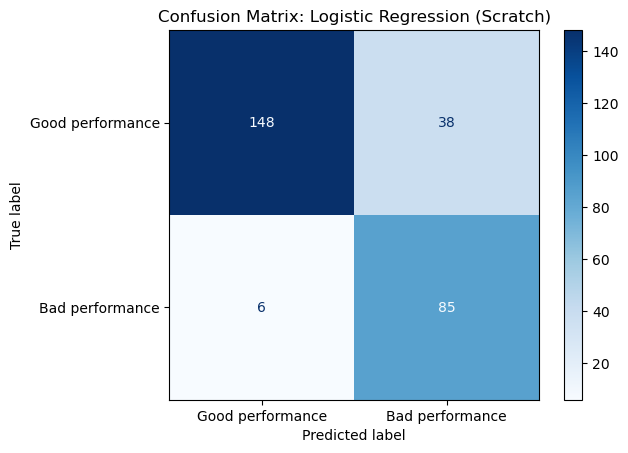

Evaluating Logistic Regression (Sklearn)
Accuracy: 0.8736
F1 Score: 0.8148
Confusion Matrix:
[[165  21]
 [ 14  77]]



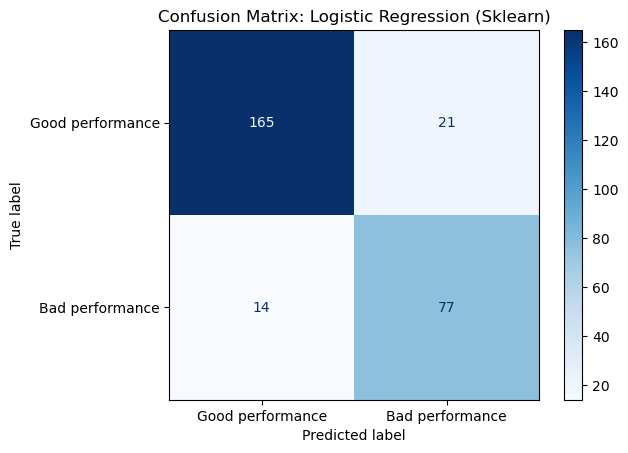

Evaluating K-Nearest Neighbors
Accuracy: 0.8159
F1 Score: 0.7273
Confusion Matrix:
[[158  28]
 [ 23  68]]



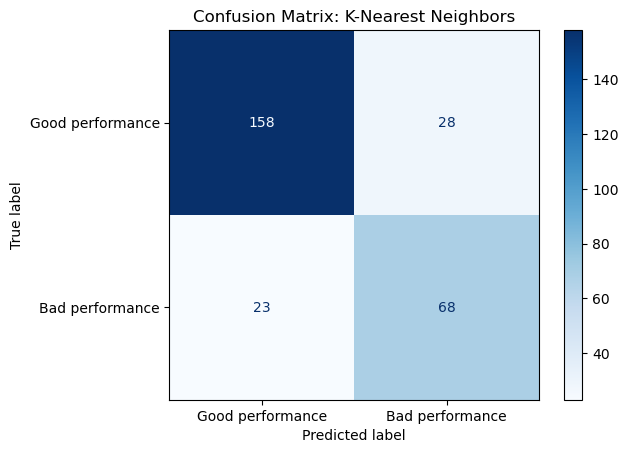

Evaluating Decision Tree
Accuracy: 0.9206
F1 Score: 0.8817
Confusion Matrix:
[[173  13]
 [  9  82]]



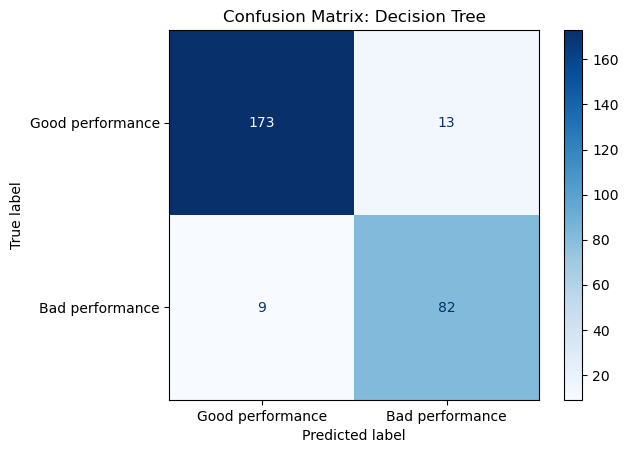

Evaluating Random Forest
Accuracy: 0.9314
F1 Score: 0.8995
Confusion Matrix:
[[173  13]
 [  6  85]]



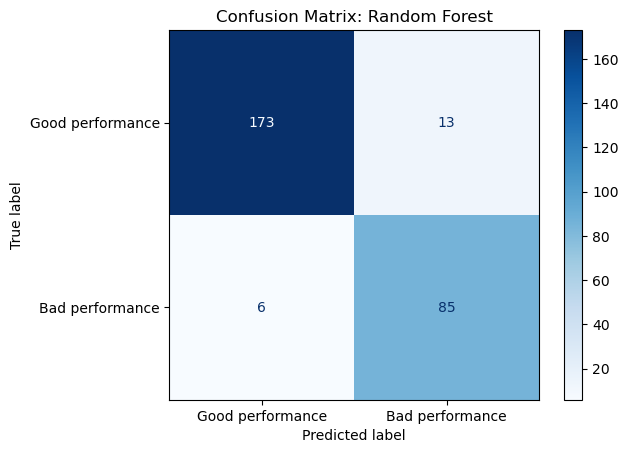

Evaluating Support Vector Machine
Accuracy: 0.8953
F1 Score: 0.8528
Confusion Matrix:
[[164  22]
 [  7  84]]



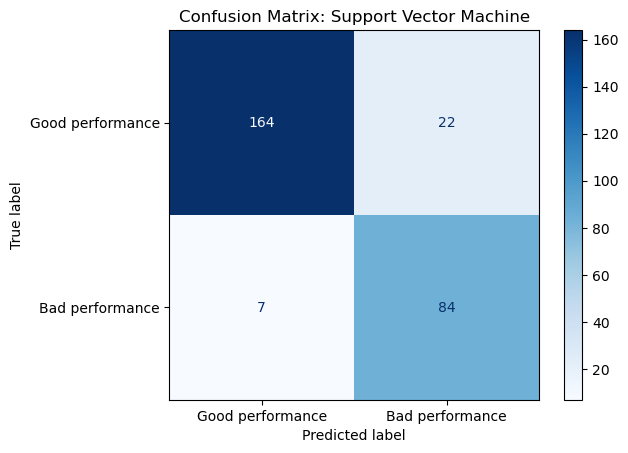

In [13]:
# Evaluation of all the models (accuracy , f1 score and confusion matrix)
evaluate_model(lr_scratch, X_test, y_test,"Logistic Regression (Scratch)")
evaluate_model(lr_sklearn , X_test, y_test, "Logistic Regression (Sklearn)") ; 
evaluate_model(knn, X_test, y_test,"K-Nearest Neighbors") ; 
evaluate_model(dt, X_test, y_test, "Decision Tree") ; 
evaluate_model(rf, X_test,  y_test, "Random Forest");
evaluate_model(svm, X_test, y_test,  "Support Vector Machine") ; 

From the above evaluation we conclude that random forest method was the best performing model with an accuracy of 93 percent and a f1-score 0.899

### Hyperparameter tuning on models

Best Parameters for Logistic Regression:  {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8715
Evaluating Logistic Regression (Tuned)
Accuracy: 0.8773
F1 Score: 0.8191
Confusion Matrix:
[[166  20]
 [ 14  77]]



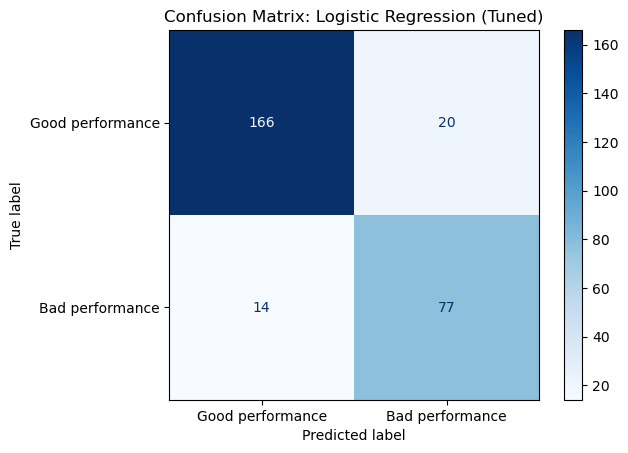

In [14]:
# 1. Logistic Regression Hyperparameter Tuning
lr_params = {
    'C': [0.01,0.1,1,10],  # Regularization strength
    'solver':['liblinear', 'saga'],  # Solver
    'max_iter': [1000, 2000]  # no of iterations
}

lr_grid_search = GridSearchCV(LogisticRegression(), param_grid=lr_params, cv=5, scoring='accuracy') ; 
lr_grid_search.fit(X_train,y_train) ; 

# Best parameters and score for Logistic Regression
print("Best Parameters for Logistic Regression: ", lr_grid_search.best_params_);
print("Best Cross-Validation Accuracy for Logistic Regression: {:.4f}".format(lr_grid_search.best_score_)) ;

# Evaluate on the test dataset
y_pred_lr_tuned = lr_grid_search.predict(X_test) ; 
evaluate_model(lr_grid_search.best_estimator_, X_test, y_test, "Logistic Regression (Tuned)") ; 

Best Parameters for K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Accuracy for KNN: 0.8118
Evaluating K-Nearest Neighbors (Tuned)
Accuracy: 0.8412
F1 Score: 0.7556
Confusion Matrix:
[[165  21]
 [ 23  68]]



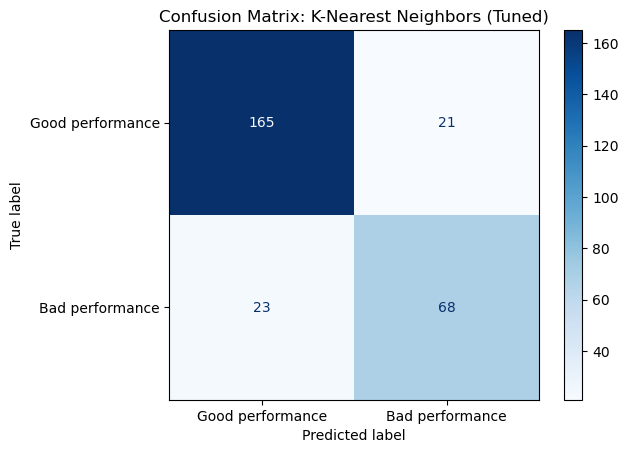

In [15]:
# 2. K-Nearest Neighbors Hyperparameter Tuning
knn_params = {
    'n_neighbors': [3,5,7,9],  # no of neighbors
    'weights': ['uniform','distance'],  # weight function for prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params,cv=5,scoring='accuracy') ; 
knn_grid_search.fit(X_train, y_train) ; 

# Best parameters and score for K-Nearest Neighbors
print("Best Parameters for K-Nearest Neighbors: ", knn_grid_search.best_params_) ; 
print("Best Cross-Validation Accuracy for KNN: {:.4f}".format(knn_grid_search.best_score_)) ; 

# Evaluating on the test dataset
y_pred_knn_tuned = knn_grid_search.predict(X_test) ; 
evaluate_model(knn_grid_search.best_estimator_, X_test, y_test, "K-Nearest Neighbors (Tuned)") ; 

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy for Decision Tree: 0.8878
Evaluating Decision Tree (Tuned)
Accuracy: 0.8953
F1 Score: 0.8432
Confusion Matrix:
[[170  16]
 [ 13  78]]



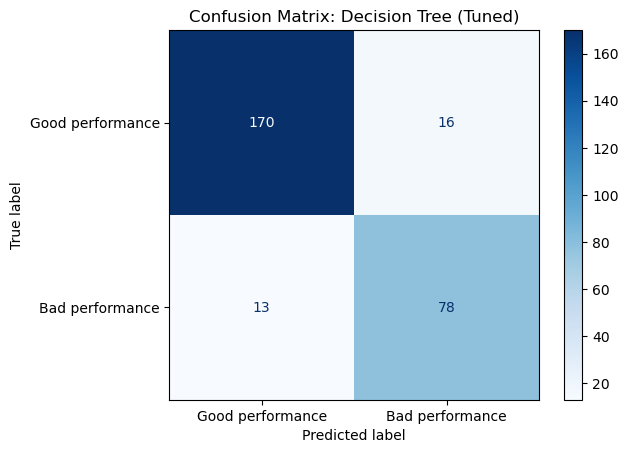

In [16]:
# 3. Decision Tree Hyperparameter Tuning
dt_params = {
    'max_depth': [None,10,20,30],  # Maximum depth of tree
    'min_samples_split': [2,5,10],  # Minimum no of samples required to split an internal node
    'min_samples_leaf': [1,2,4],  # Minimum no of samples required to be at a leaf node
    'criterion': ['gini','entropy']  # Function to measure the quality of a split
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train,y_train)

# Best parameters and score for Decision Tree
print("Best Parameters for Decision Tree: ", dt_grid_search.best_params_) ;
print("Best Cross-Validation Accuracy for Decision Tree: {:.4f}".format(dt_grid_search.best_score_)) ; 

# Evaluate on the test dataset
y_pred_dt_tuned = dt_grid_search.predict(X_test)
evaluate_model(dt_grid_search.best_estimator_, X_test, y_test, "Decision Tree (Tuned)")

Best Parameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest: 0.9240
Evaluating Random Forest (Tuned)
Accuracy: 0.9278
F1 Score: 0.8936
Confusion Matrix:
[[173  13]
 [  7  84]]



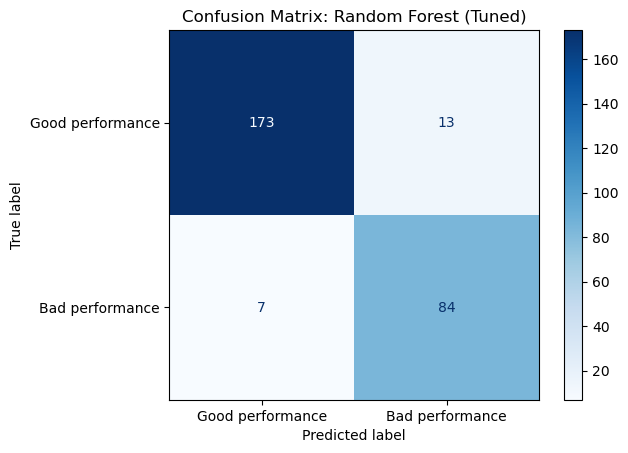

In [17]:
# 4. Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='accuracy') ; 
rf_grid_search.fit(X_train, y_train) ; 

# Best parameters and score for Random Forest
print("Best Parameters for Random Forest: ", rf_grid_search.best_params_) ; 
print("Best Cross-Validation Accuracy for Random Forest: {:.4f}".format(rf_grid_search.best_score_)) ;

# Evaluating on the test dataset
y_pred_rf_tuned = rf_grid_search.predict(X_test) ; 
evaluate_model(rf_grid_search.best_estimator_, X_test, y_test, "Random Forest (Tuned)") ; 